In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
data = pd.read_csv('/Users/zoohunn/Desktop/비어플/비어플[금융]/datasets/include_proxy_v2_strategy_type.csv')
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668794 entries, 0 to 1668793
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1668794 non-null  int64  
 1   individual_id        1668794 non-null  float64
 2   curr_ann_amt         1668794 non-null  float64
 3   days_tenure          1668794 non-null  float64
 4   cust_orig_date       1668794 non-null  object 
 5   date_of_birth        1668794 non-null  object 
 6   income               1668794 non-null  float64
 7   has_children         1668794 non-null  int64  
 8   length_of_residence  1668794 non-null  float64
 9   home_market_value    1668794 non-null  object 
 10  age_in_years         1668794 non-null  int64  
 11  home_owner           1668794 non-null  float64
 12  college_degree       1668794 non-null  float64
 13  good_credit          1668794 non-null  float64
 14  city                 1668794 non-null  object 
 15

In [3]:
df.head()

,Unnamed: 0,individual_id,curr_ann_amt,days_tenure,cust_orig_date,date_of_birth,income,has_children,length_of_residence,home_market_value,...,city,county,cust_orig_year,cust_orig_month,churn,tenure_years,age_at_orig,premium_to_income,policy_proxy_v2,strategy_type_final
0,0,2.213000e+11,818.877997,1454.0,2018-12-09,1978-06-23,22500.0,1,15.0,50000 - 74999,...,Kaufman,Kaufman,2018,2018-12,0,3.980835,40.0,0.036395,Universal Life,혼합형
1,1,2.213001e+11,974.199182,1795.0,2018-01-02,1950-05-30,27500.0,0,2.0,50000 - 74999,...,Grand Prairie,Dallas,2018,2018-01,0,4.914442,67.0,0.035425,Universal Life,혼합형
2,2,2.213007e+11,967.375112,4818.0,2009-09-23,1967-07-07,42500.0,0,10.0,75000 - 99999,...,Dallas,Dallas,2009,2009-09,0,13.190965,42.0,0.022762,Universal Life,혼합형
3,3,2.213016e+11,992.409561,130.0,2022-07-25,1969-05-25,125000.0,1,6.0,175000 - 199999,...,Arlington,Tarrant,2022,2022-07,1,0.355921,53.0,0.007939,Universal Life,안정형
4,4,2.213016e+11,784.633494,5896.0,2006-10-11,1972-09-25,87500.0,1,4.0,225000 - 249999,...,Fort Worth,Tarrant,2006,2006-10,0,16.142368,34.0,0.008967,Universal Life,혼합형


In [4]:
# 우리가 간과한 나이 변수들을 현재 보험사들 기준으로 제한을 둬야함

In [5]:
df['age_at_orig'].describe()

count    1.668794e+06
mean     4.556833e+01
std      1.406733e+01
min      1.800000e+01
25%      3.500000e+01
50%      4.400000e+01
75%      5.400000e+01
max      1.120000e+02
Name: age_at_orig, dtype: float64

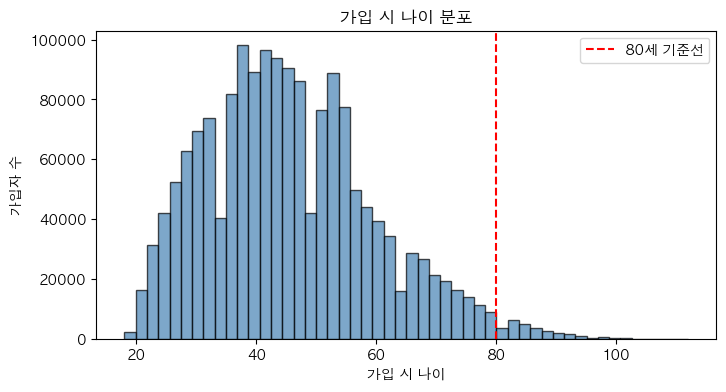

In [6]:
plt.figure(figsize=(8,4))
plt.hist(df['age_at_orig'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(80, color='red', linestyle='--', label='80세 기준선')
plt.title('가입 시 나이 분포')
plt.xlabel('가입 시 나이')
plt.ylabel('가입자 수')
plt.legend()
plt.show()


In [7]:
# 18세 미만 고객 수 및 비율 확인
over18 = df[df['age_at_orig'] < 18]
print("18세 미만 고객 수:", len(over18))
print("전체 대비 비율: {:.2f}%".format(len(over18)/len(df)*100))

18세 미만 고객 수: 0
전체 대비 비율: 0.00%


In [12]:
# 19세 미만 고객 수 및 비율 확인
over19 = df[df['age_at_orig'] < 19]
print("19세 미만 고객 수:", len(over19))
print("전체 대비 비율: {:.2f}%".format(len(over19)/len(df)*100))

19세 미만 고객 수: 64
전체 대비 비율: 0.00%


In [10]:
# 70세 초과 고객 수 및 비율 확인
over70 = df[df['age_at_orig'] > 70]
print("70세 초과 고객 수:", len(over70))
print("전체 대비 비율: {:.2f}%".format(len(over70)/len(df)*100))

70세 초과 고객 수: 96731
전체 대비 비율: 5.80%


In [9]:
# 80세 초과 고객 수 및 비율 확인
over80 = df[df['age_at_orig'] > 80]
print("80세 초과 고객 수:", len(over80))
print("전체 대비 비율: {:.2f}%".format(len(over80)/len(df)*100))


80세 초과 고객 수: 26802
전체 대비 비율: 1.61%


In [10]:
df_clean = df[(df['age_at_orig'] >= 18) & (df['age_at_orig'] <= 80)].copy()

print("제거 전:", len(df))
print("제거 후:", len(df_clean))
print("제거된 행 수:", len(df) - len(df_clean))

제거 전: 1668794
제거 후: 1641992
제거된 행 수: 26802


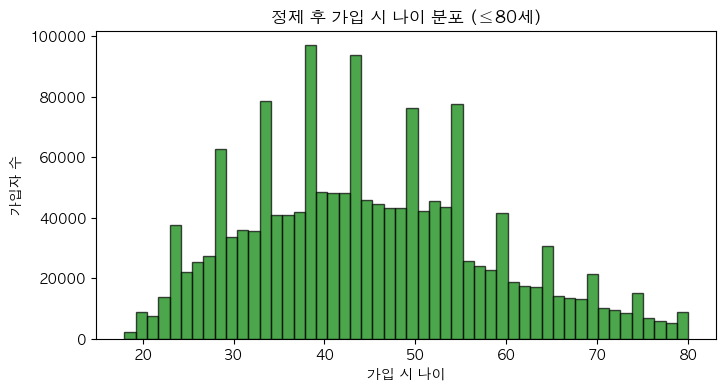

count    1.641992e+06
mean     4.490509e+01
std      1.316681e+01
min      1.800000e+01
25%      3.500000e+01
50%      4.400000e+01
75%      5.300000e+01
max      8.000000e+01
Name: age_at_orig, dtype: float64

In [11]:
# 정제 후 고객 나이 분포 시각화
plt.figure(figsize=(8,4))
plt.hist(df_clean['age_at_orig'], bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title('정제 후 가입 시 나이 분포 (≤80세)')
plt.xlabel('가입 시 나이')
plt.ylabel('가입자 수')
plt.show()

df_clean['age_at_orig'].describe()

In [12]:
df_clean.to_csv('/Users/zoohunn/Desktop/비어플/비어플[금융]/datasets/customer_data_age_filtered.csv')